In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv(r"C:\Users\LELETI\Desktop\EDA\insurance.csv") 

In [5]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.duplicated().sum()

1

In [8]:
df['bmi'].unique()
df['age'].unique()
df['sex'].unique()

array(['female', 'male'], dtype=object)

C:\Users\LELETI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

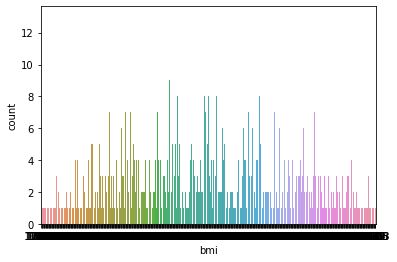

In [9]:
sns.countplot(df['bmi']).unique()

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [54]:
client = df.drop(['children'], axis=1)

In [55]:
client.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df[df['bmi']==2].head()

,age,sex,bmi,children,smoker,region,charges


<AxesSubplot:>

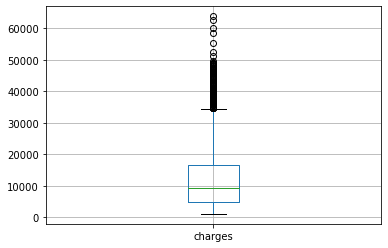

In [13]:
df[['charges']].boxplot()

In [56]:
correlation= client.corr

In [57]:
client.corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


<AxesSubplot:>

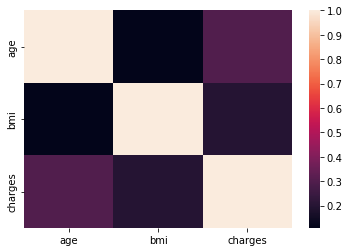

In [59]:
sns.heatmap(client.corr())

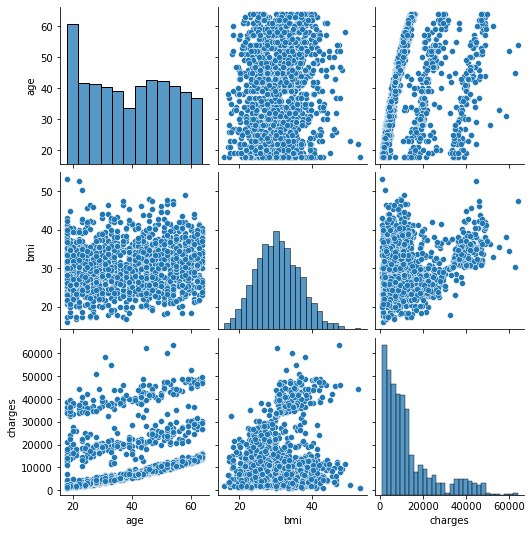

In [60]:
sns.pairplot(client)

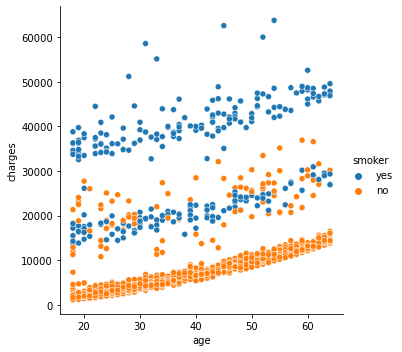

In [61]:
sns.relplot(x='age', y='charges', hue='smoker', data=client)

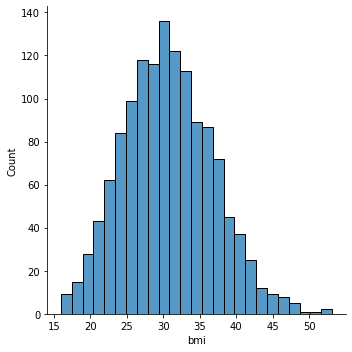

In [62]:
sns.displot(client['bmi'])

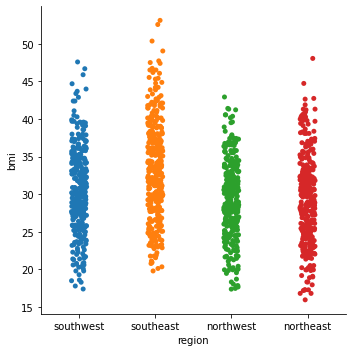

In [63]:
sns.catplot(x='region', y='bmi', data=client)

In [36]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\LELETI\Desktop\EDA\insurance.csv",usecols=[0,2])
dataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1338 non-null   int64  
 1   bmi     1338 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


<AxesSubplot:xlabel='age', ylabel='bmi'>

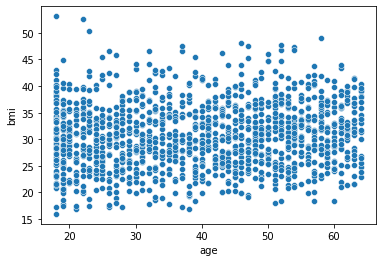

In [64]:
import seaborn as sns 

sns.scatterplot(
    x=dataset["age"], 
    y=dataset["bmi"],
)

In [67]:
mean_x = np.mean(X)
mean_y = np.mean(y)

# Total number 
m = len(X)
numer = 0
denominator = 0
for i in range(m):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
    b1 = numer / denominator
    b2 = mean_y - (b1 * mean_x)

print(b1, b2)

0.047427917224560225 28.803889305169506


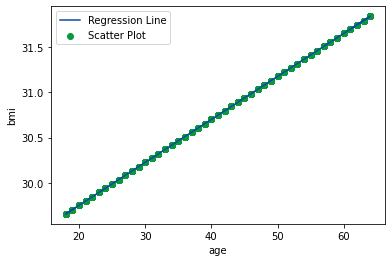

In [73]:
# Plotting values and regression line
max_X = np.max(X) + 100
min_X = np.min(X) - 100

# Calculating values x and y
x = np.linspace(min_X, max_X, 10)
y = b2 + b1 * X

# Ploting line
plt.plot(X, y, color='#0B47A4', label='Regression Line')
# Ploting scatter points
plt.scatter(X, y, c='#09993B', label='Scatter Plot')
plt.xlabel('age')
plt.ylabel('bmi')
plt.legend()
plt.show()

In [74]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
print(r2)

1.0
